In [7]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# I converted  dates to UNIX timestamp
def date_to_unix(date):
    return int(datetime.strptime(date, "%Y-%m-%d").timestamp())

API_KEY = "a798909b77dfa391a4878c399a0a7f9c"

# Defining the location coordinates for Mauritius
locations = {
         "Port-Louis": {"lat": -20.1609, "lon": 57.5012},
    "Ebene": {"lat": -20.2429, "lon": 57.4713},
    "Quatre Bornes": {"lat": -20.2640, "lon": 57.4713},
    "Curepipe": {"lat": -20.3148, "lon": 57.5206},
    "Vacoas-Phoenix": {"lat": -20.2976, "lon": 57.4784},
    "Tamarin": {"lat": -20.3253, "lon": 57.3704},
    "Flic en Flac": {"lat": -20.2719, "lon": 57.3616},
    "Grand Baie": {"lat": -20.0183, "lon": 57.5802},
    "Mahebourg": {"lat": -20.4081, "lon": 57.7000},
    "Rose Hill": {"lat": -20.2353, "lon": 57.4804},
    "Beau Bassin-Rose Hill": {"lat": -20.2353, "lon": 57.4804},
    "Moka": {"lat": -20.2186, "lon": 57.5007},
    "Rose Belle": {"lat": -20.4067, "lon": 57.5944},
    "Flacq": {"lat": -20.2076, "lon": 57.7219}
}

# Defining the start and end dates for the analysis period
start_date = "2020-01-01"
end_date = "2023-12-31"


def fetch_air_pollution_data(lat, lon, start_unix, end_unix):
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_unix}&end={end_unix}&appid={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching data: {response.status_code} - {response.text}")
        return None

# Collecting data for each location
data_frames = []

for location_name, coords in locations.items():
    lat, lon = coords["lat"], coords["lon"]
    
    # Converting start and end dates to UNIX timestamps
    start_unix = date_to_unix(start_date)
    end_unix = date_to_unix(end_date)
    
    # Fetching the data
    pollution_data = fetch_air_pollution_data(lat, lon, start_unix, end_unix)
    
    if pollution_data:
        # Processing the JSON data into a DataFrame
        for item in pollution_data['list']:
            dt = datetime.utcfromtimestamp(item['dt'])
            data_frames.append({
                "Location": location_name,
                "Date": dt,
                "CO": item['components']['co'],
                "NO": item['components']['no'],
                "NO2": item['components']['no2'],
                "O3": item['components']['o3'],
                "SO2": item['components']['so2'],
                "PM2.5": item['components']['pm2_5'],
                "PM10": item['components']['pm10'],
                "NH3": item['components']['nh3']
            })

# Converting to a pandas DataFrame
df_pollution = pd.DataFrame(data_frames)

# Saving the DataFrame to a CSV file
df_pollution.to_csv('air_pollution_data_2020_2023.csv', index=False)
print("Data saved to air_pollution_data_2020_2023.csv")


C:\Users\Olivier\AppData\Local\Temp\ipykernel_17424\1295481922.py:59: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt = datetime.utcfromtimestamp(item['dt'])


Data saved to air_pollution_data_2020_2023.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the air pollution data
df_pollution = pd.read_csv('air_pollution_data_2020_2023.csv')

# Cleaning the data: Replace -9999 values with NaN
df_pollution.replace(-9999, np.nan, inplace=True)

print(df_pollution.head())

print(df_pollution.describe())

print(df_pollution.isnull().sum())


     Location                 Date      CO    NO   NO2     O3   SO2  PM2.5  \
0  Port-Louis  2020-11-25 01:00:00  175.24  0.00  0.65  26.82  0.97   7.98   
1  Port-Louis  2020-11-25 02:00:00  176.91  0.01  0.76  28.61  1.03   8.16   
2  Port-Louis  2020-11-25 03:00:00  185.25  0.14  1.17  31.11  1.16   9.01   
3  Port-Louis  2020-11-25 04:00:00  186.92  0.35  1.34  33.98  1.22   9.36   
4  Port-Louis  2020-11-25 05:00:00  185.25  0.39  1.17  37.19  1.25   9.19   

    PM10   NH3  
0  12.64  0.80  
1  13.42  0.71  
2  15.21  0.67  
3  15.42  0.50  
4  14.94  0.44  
                  CO             NO            NO2             O3  \
count  375256.000000  375256.000000  375256.000000  375242.000000   
mean      246.764443       0.235632       2.566708      40.351754   
std        78.124636       0.888440       3.807522      17.894110   
min       153.540000       0.000000       0.030000       0.000000   
25%       213.620000       0.000000       0.800000      25.750000   
50%       226.9

In [3]:
df_pollution.describe()

,CO,NO,NO2,O3,SO2,PM2.5,PM10,NH3
count,375256.000000,375256.000000,375256.000000,375242.000000,375256.000000,375256.000000,375256.000000,375256.000000
mean,246.764443,0.235632,2.566708,40.351754,1.493645,4.339515,10.123601,1.377898
std,78.124636,0.888440,3.807522,17.894110,1.308262,3.224870,5.585307,2.851070
min,153.540000,0.000000,0.030000,0.000000,0.040000,0.500000,0.740000,0.000000
25%,213.620000,0.000000,0.800000,25.750000,0.580000,2.640000,6.440000,0.400000
50%,226.970000,0.020000,1.560000,39.340000,1.180000,3.710000,9.370000,0.750000
75%,250.340000,0.240000,2.870000,54.360000,1.970000,5.170000,12.720000,1.250000
max,1602.170000,38.890000,85.680000,117.300000,25.270000,79.100000,102.400000,82.080000


In [5]:
df_pollution.index = pd.to_datetime(df_pollution['Date'])
df_pollution['Month'] = df_pollution.index.month


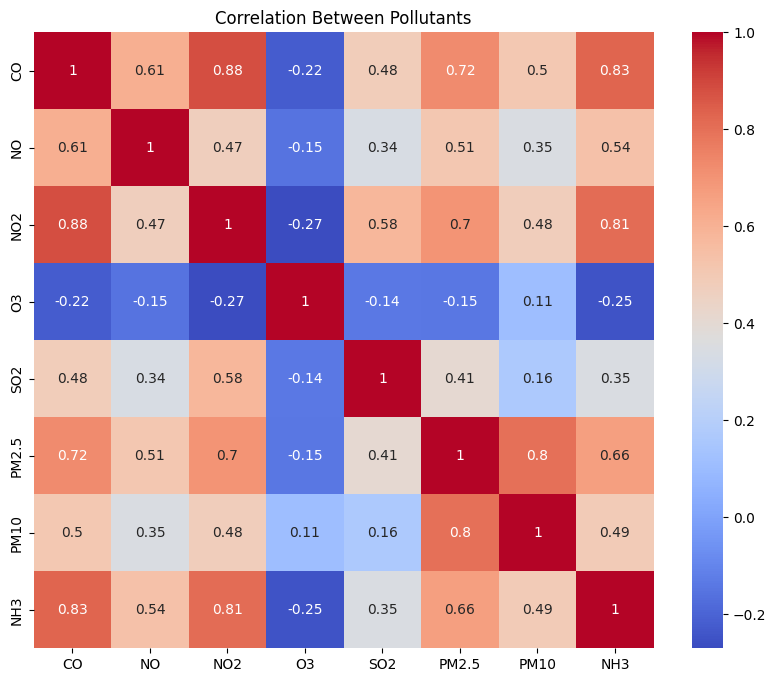

In [6]:
# Calculating the correlation matrix for the pollutants
correlation_matrix = df_pollution[['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']].corr()

# Ploting a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pollutants')
plt.show()


Analysis of the Heatmap
High Positive Correlations:

CO and NO2 (0.88): There is a strong positive correlation between CO and NO2, suggesting that these two pollutants often increase together. This could be due to shared sources, such as vehicle emissions and industrial activities.
CO and NH3 (0.83): There is also a high positive correlation between CO and NH3. Both may originate from similar combustion processes.
NO2 and NH3 (0.81): NO2 and NH3 have a strong positive correlation, possibly indicating that these pollutants are prevalent together in certain environmental conditions or due to similar sources.
PM2.5 and PM10 (0.80): There is a strong correlation between PM2.5 and PM10, which is expected since both are particulate matter and can originate from similar sources like road dust, construction activities, and combustion processes.
Moderate Positive Correlations:

CO and PM2.5 (0.72) and NO2 and PM2.5 (0.70): Both CO and NO2 have a moderate positive correlation with PM2.5, which suggests that sources contributing to CO and NO2 (like combustion engines) also contribute to PM2.5.
CO and PM10 (0.50): This indicates that CO and PM10 levels tend to increase together moderately.
Negative Correlations:

O3 with Other Pollutants:
O3 and CO (-0.22), O3 and NO (-0.15), O3 and NO2 (-0.27), O3 and PM2.5 (-0.15), and O3 and PM10 (0.11): These negative correlations suggest that as the concentrations of O3 increase, the concentrations of CO, NO, NO2, and particulate matter tend to decrease, or vice versa. This can be due to the chemical reactions in the atmosphere where O3 is involved, often breaking down or forming differently in the presence of NOx (NO and NO2) and particulates. Ozone is typically a secondary pollutant formed under specific atmospheric conditions, often when NOx levels decrease.
Minimal Correlation:

SO2 correlations: SO2 does not show strong correlations with most pollutants. It has a low to moderate positive correlation with NO2 (0.58) and PM2.5 (0.41), indicating its presence alongside these pollutants, but not in a directly proportional manner.
Conclusions from the Heatmap
Shared Sources of Pollution: The strong positive correlations among CO, NO2, PM2.5, PM10, and NH3 suggest that these pollutants often share common sources, such as vehicle exhaust, industrial emissions, and combustion processes.
Inverse Relationship of Ozone: The negative correlations involving O3 suggest a different pattern, potentially due to its nature as a secondary pollutant formed under certain conditions (e.g., sunlight and precursor pollutants like NOx).
Differentiated Behaviors of Pollutants: Pollutants that show weak or negative correlations (like O3 with NOx) highlight how different types of pollutants can behave under varying environmental conditions and their different roles in atmospheric chemistry.

Columns in DataFrame: Index(['Location', 'Date', 'CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10',
       'NH3'],
      dtype='object')
Missing values after conversion: Location    0
Date        0
CO          0
NO          0
NO2         0
O3          0
SO2         0
PM2.5       0
PM10        0
NH3         0
dtype: int64


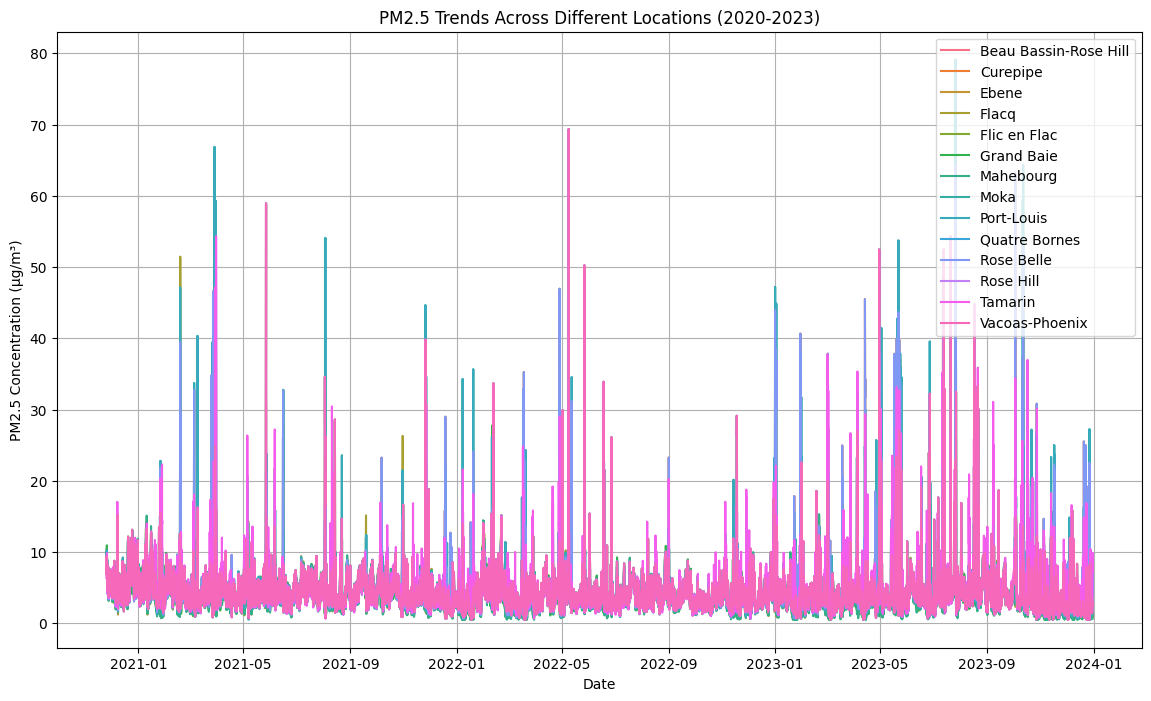

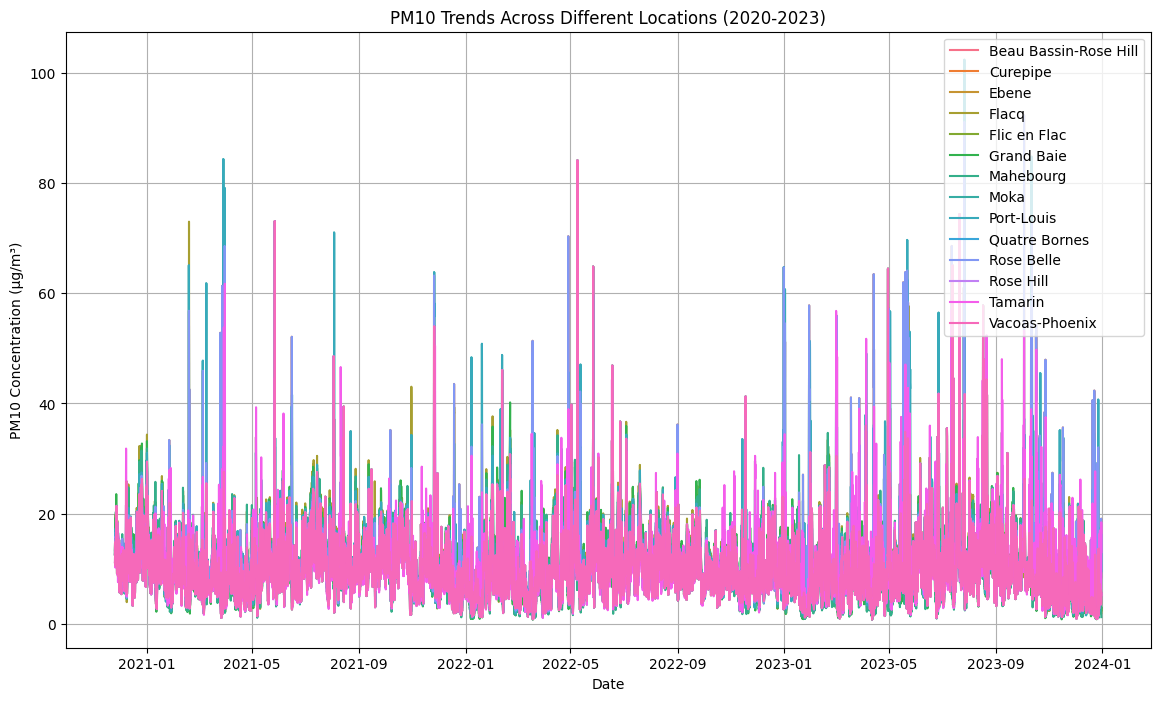

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the air pollution data
df_pollution = pd.read_csv('air_pollution_data_2020_2023.csv')

# Printing out the columns to see what is available
print("Columns in DataFrame:", df_pollution.columns)

# Ensuring all relevant pollutant columns are numeric
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2.5', 'PM10', 'NH3']

# Converting relevant columns to numeric, errors='coerce' will set non-convertible values to NaN
for pollutant in pollutants:
    df_pollution[pollutant] = pd.to_numeric(df_pollution[pollutant], errors='coerce')

df_pollution['Date'] = pd.to_datetime(df_pollution['Date'], errors='coerce')

print("Missing values after conversion:", df_pollution.isnull().sum())

# Grouping by 'Location' and 'Date' to calculate mean pollution levels for each location over time
location_pollution = df_pollution.groupby(['Location', 'Date'])[pollutants].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=location_pollution, x='Date', y='PM2.5', hue='Location')
plt.title('PM2.5 Trends Across Different Locations (2020-2023)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (µg/m³)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 8))
sns.lineplot(data=location_pollution, x='Date', y='PM10', hue='Location')
plt.title('PM10 Trends Across Different Locations (2020-2023)')
plt.xlabel('Date')
plt.ylabel('PM10 Concentration (µg/m³)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



In [10]:
import pandas as pd

# Loading vehicle registration data
vehicle_data = pd.read_csv('vehicle_registration_data_full.csv')

print(vehicle_data.head())

vehicle_data['Year_2020'] = pd.to_numeric(vehicle_data['Year_2020'].str.replace(',', ''), errors='coerce')
vehicle_data['Year_2021'] = pd.to_numeric(vehicle_data['Year_2021'].str.replace(',', ''), errors='coerce')
vehicle_data['Year_2022'] = pd.to_numeric(vehicle_data['Year_2022'].str.replace(',', ''), errors='coerce')
vehicle_data['Year_2023'] = pd.to_numeric(vehicle_data['Year_2023'].str.replace(',', ''), errors='coerce')

vehicle_data_long = vehicle_data.melt(id_vars=['Vehicle_Type'], 
                                      value_vars=['Year_2020', 'Year_2021', 'Year_2022', 'Year_2023'], 
                                      var_name='Year', 
                                      value_name='Registrations')

vehicle_data_long['Year'] = vehicle_data_long['Year'].str.extract(r'(\d+)').astype(int)

# Display the reshaped data
print(vehicle_data_long.head())
vehicle_data_long['Registrations'] = pd.to_numeric(vehicle_data_long['Registrations'], errors='coerce')

print(vehicle_data_long.info())


           Vehicle_Type Year_2020 Year_2021 Year_2022 Year_2023
0                   Car   264,120   277,066   292,631   311,914
1  Dual purpose vehicle    47,908    47,834    47,739    47,673
2     Double cab pickup     8,036     9,204    10,626    12,279
3       Heavy motor car     1,377     1,380     1,398     1,425
4           Motor cycle   103,589   107,725   112,087   116,786
           Vehicle_Type  Year  Registrations
0                   Car  2020         264120
1  Dual purpose vehicle  2020          47908
2     Double cab pickup  2020           8036
3       Heavy motor car  2020           1377
4           Motor cycle  2020         103589
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Vehicle_Type   56 non-null     object
 1   Year           56 non-null     int64 
 2   Registrations  56 non-null     int64 
dtypes: int64(2), object(1)
m

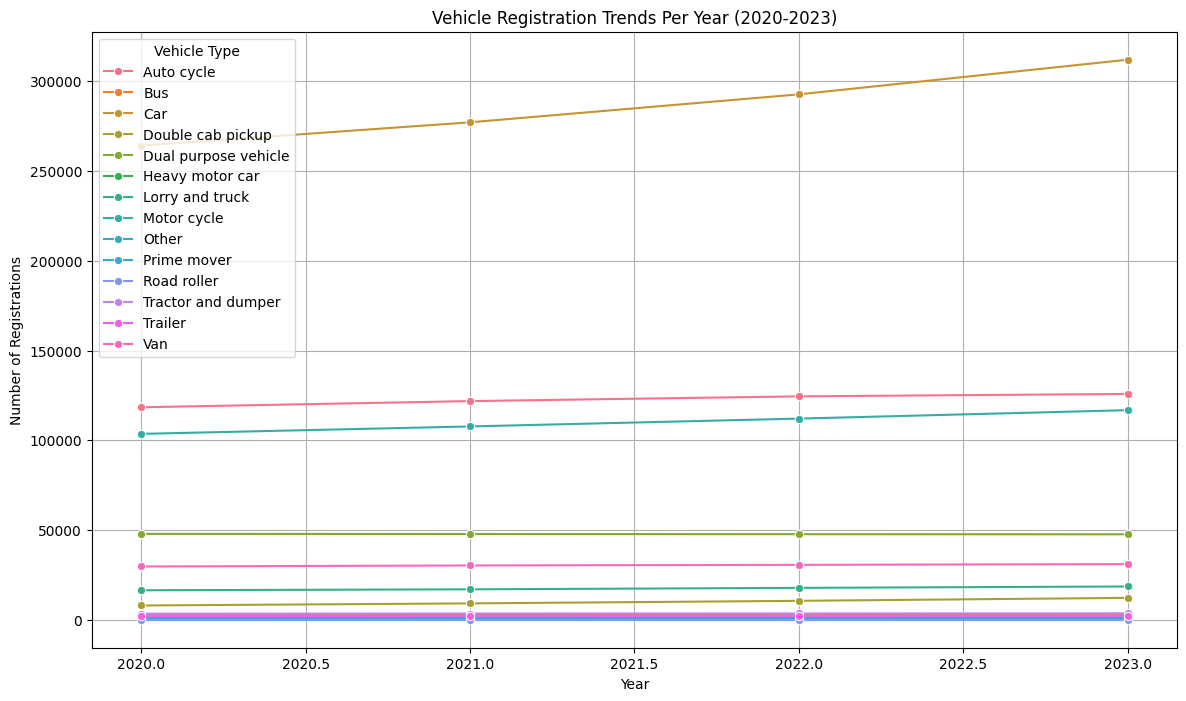

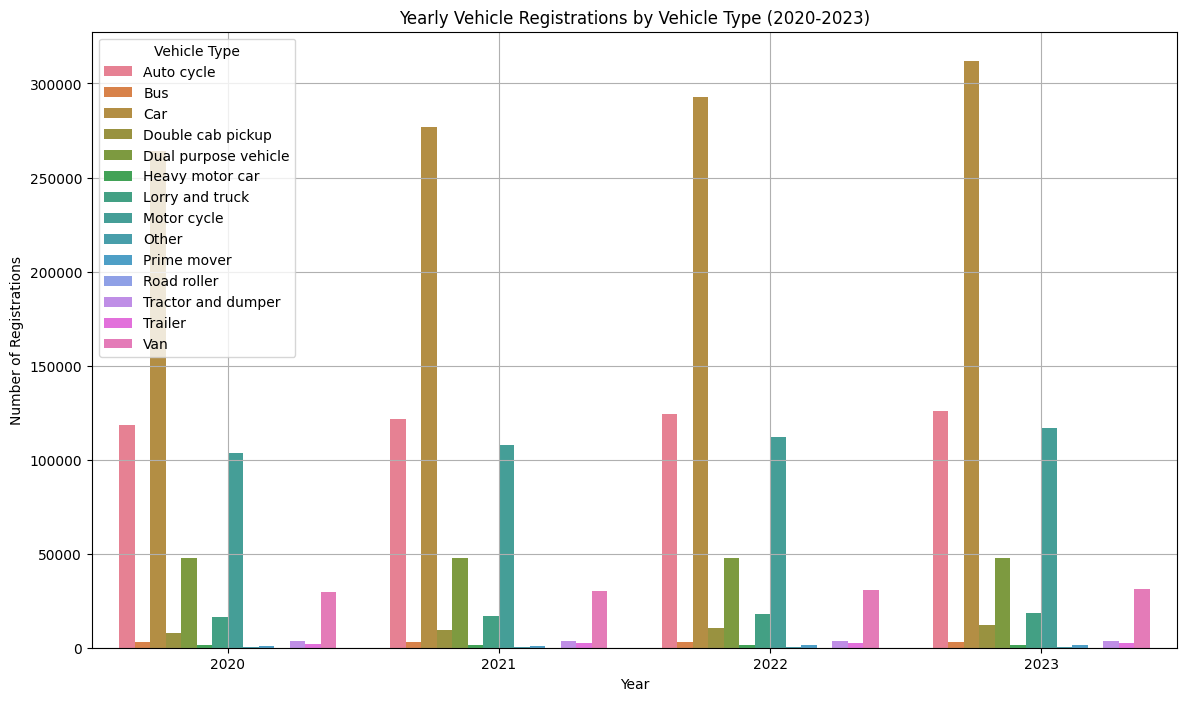

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating the data by year and vehicle type
vehicle_trends = vehicle_data_long.groupby(['Year', 'Vehicle_Type'])['Registrations'].sum().reset_index()

# Line plot to show trends of vehicle registrations over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=vehicle_trends, x='Year', y='Registrations', hue='Vehicle_Type', marker='o')
plt.title('Vehicle Registration Trends Per Year (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.grid(True)
plt.legend(title='Vehicle Type', loc='upper left')
plt.show()

# Bar plot to compare total registrations by vehicle type for each year
plt.figure(figsize=(14, 8))
sns.barplot(data=vehicle_trends, x='Year', y='Registrations', hue='Vehicle_Type')
plt.title('Yearly Vehicle Registrations by Vehicle Type (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend(title='Vehicle Type', loc='upper left')
plt.grid(True)
plt.show()


AIR POLLUTION TRENDS 2020-2023

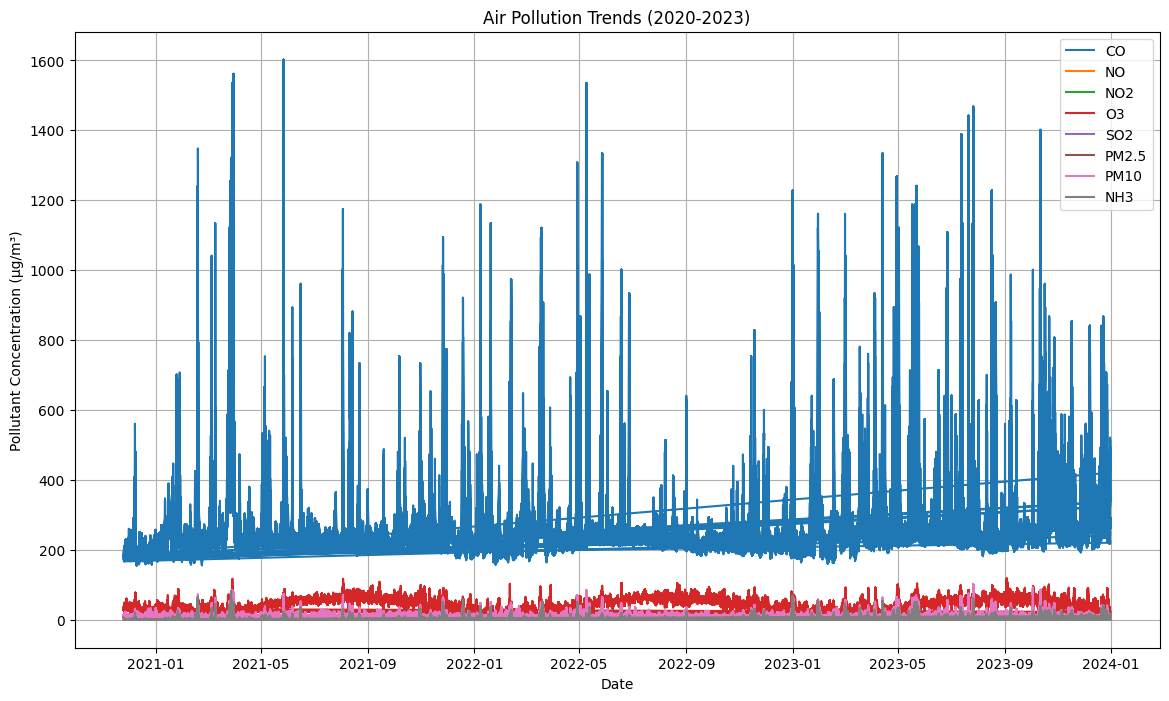

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the air pollution data
df_pollution = pd.read_csv('air_pollution_data_2020_2023.csv')

# Converting the 'Date' column to datetime format for easier manipulation
df_pollution['Date'] = pd.to_datetime(df_pollution['Date'], errors='coerce')
df_pollution.replace(-9999, np.nan, inplace=True)
# Set the date as the index for time series plotting
df_pollution.set_index('Date', inplace=True)

# Ploting trends for each pollutant
plt.figure(figsize=(14, 8))
plt.plot(df_pollution.index, df_pollution['CO'], label='CO')
plt.plot(df_pollution.index, df_pollution['NO'], label='NO')
plt.plot(df_pollution.index, df_pollution['NO2'], label='NO2')
plt.plot(df_pollution.index, df_pollution['O3'], label='O3')
plt.plot(df_pollution.index, df_pollution['SO2'], label='SO2')
plt.plot(df_pollution.index, df_pollution['PM2.5'], label='PM2.5')
plt.plot(df_pollution.index, df_pollution['PM10'], label='PM10')
plt.plot(df_pollution.index, df_pollution['NH3'], label='NH3')
plt.title('Air Pollution Trends (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the air pollution data
df_pollution = pd.read_csv('air_pollution_data_2020_2023.csv')

print(df_pollution.head())

print(df_pollution.dtypes)

df_pollution['Date'] = pd.to_datetime(df_pollution['Date'], errors='coerce')
df_pollution.replace(-9999, np.nan, inplace=True)

# Extract the year from the 'Date' column
df_pollution['Year'] = df_pollution['Date'].dt.year

# Convert relevant columns to numeric, errors='coerce' will set non-convertible values to NaN
numeric_columns = df_pollution.select_dtypes(include=['object']).columns

for col in numeric_columns:
    df_pollution[col] = pd.to_numeric(df_pollution[col], errors='coerce')

# Check for missing data
print("Missing values after conversion:", df_pollution.isnull().sum())

# Group the pollution data by year to calculate average pollution levels
# Only include numeric columns for the groupby operation
yearly_pollution = df_pollution.groupby('Year').mean(numeric_only=True).reset_index()

# Display the prepared pollution data
print(yearly_pollution.head())


     Location                 Date      CO    NO   NO2     O3   SO2  PM2.5  \
0  Port-Louis  2020-11-25 01:00:00  175.24  0.00  0.65  26.82  0.97   7.98   
1  Port-Louis  2020-11-25 02:00:00  176.91  0.01  0.76  28.61  1.03   8.16   
2  Port-Louis  2020-11-25 03:00:00  185.25  0.14  1.17  31.11  1.16   9.01   
3  Port-Louis  2020-11-25 04:00:00  186.92  0.35  1.34  33.98  1.22   9.36   
4  Port-Louis  2020-11-25 05:00:00  185.25  0.39  1.17  37.19  1.25   9.19   

    PM10   NH3  
0  12.64  0.80  
1  13.42  0.71  
2  15.21  0.67  
3  15.42  0.50  
4  14.94  0.44  
Location     object
Date         object
CO          float64
NO          float64
NO2         float64
O3          float64
SO2         float64
PM2.5       float64
PM10        float64
NH3         float64
dtype: object
Missing values after conversion: Location    375256
Date             0
CO               0
NO               0
NO2              0
O3              14
SO2              0
PM2.5            0
PM10             0
NH3        

In [20]:
# Merging vehicle registration data with pollution data on the 'Year' column
merged_data = pd.merge(vehicle_data_long, yearly_pollution, on='Year', how='inner')

# Display the first few rows of the merged dataset
print(merged_data.head())


           Vehicle_Type  Year  Registrations  Location          CO        NO  \
0                   Car  2020         264120       NaN  201.201863  0.166358   
1  Dual purpose vehicle  2020          47908       NaN  201.201863  0.166358   
2     Double cab pickup  2020           8036       NaN  201.201863  0.166358   
3       Heavy motor car  2020           1377       NaN  201.201863  0.166358   
4           Motor cycle  2020         103589       NaN  201.201863  0.166358   

        NO2         O3       SO2     PM2.5       PM10       NH3  
0  1.451407  30.695537  1.378264  6.024941  12.840544  0.630569  
1  1.451407  30.695537  1.378264  6.024941  12.840544  0.630569  
2  1.451407  30.695537  1.378264  6.024941  12.840544  0.630569  
3  1.451407  30.695537  1.378264  6.024941  12.840544  0.630569  
4  1.451407  30.695537  1.378264  6.024941  12.840544  0.630569  


In [21]:
# Selecting only the numeric columns for correlation analysis
merged_data = pd.merge(vehicle_data_long, yearly_pollution, on='Year', how='inner')

# Selecting only the numeric columns for correlation analysis
numeric_columns = merged_data.select_dtypes(include=['number'])

# Calculate correlations between numeric columns only
correlations = numeric_columns.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlations)

# Identifying significant correlations (if any)
significant_correlations = correlations[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3']].sort_values(by='PM2.5', ascending=False)
print("Significant Correlations with PM2.5:")
print(significant_correlations)


Correlation Matrix:
                   Year  Registrations  Location        CO        NO  \
Year           1.000000       0.026189       NaN  0.921568  0.880490   
Registrations  0.026189       1.000000       NaN  0.024033  0.023377   
Location            NaN            NaN       NaN       NaN       NaN   
CO             0.921568       0.024033       NaN  1.000000  0.940848   
NO             0.880490       0.023377       NaN  0.940848  1.000000   
NO2            0.938825       0.024749       NaN  0.975028  0.987130   
O3             0.612561       0.015119       NaN  0.721045  0.444615   
SO2            0.803019       0.021565       NaN  0.858716  0.981389   
PM2.5         -0.812519      -0.020564       NaN -0.812367 -0.581437   
PM10          -0.890724      -0.022810       NaN -0.920989 -0.744096   
NH3            0.938082       0.024697       NaN  0.981015  0.984334   

                    NO2        O3       SO2     PM2.5      PM10       NH3  
Year           0.938825  0.612561  0.80

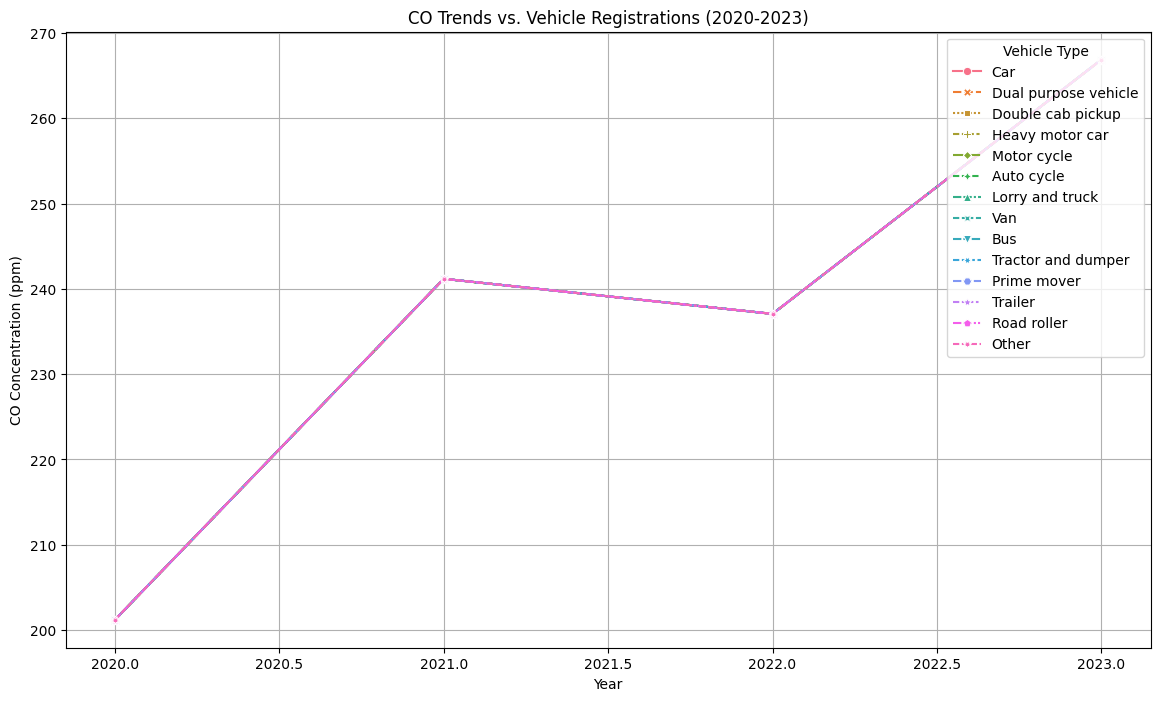

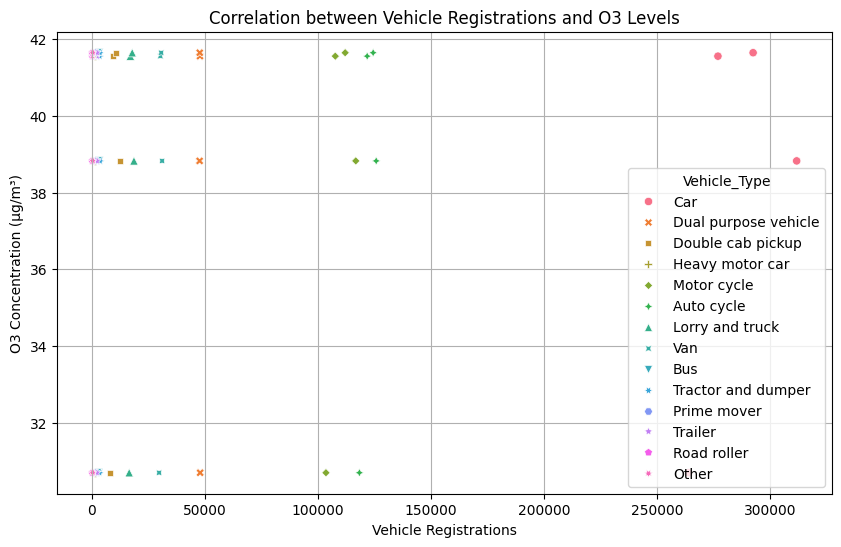

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for CO trends vs. vehicle registrations over the years

plt.figure(figsize=(14, 8))
sns.lineplot(data=merged_data, x='Year', y='CO', hue='Vehicle_Type', style='Vehicle_Type', markers=True)
plt.title('CO Trends vs. Vehicle Registrations (2020-2023)')
plt.xlabel('Year')
plt.ylabel('CO Concentration (ppm)')
plt.legend(title='Vehicle Type', loc='upper right')
plt.grid(True)
plt.show()

# Scatter plot for O3 trends vs. vehicle registrations over the years
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Registrations', y='O3', hue='Vehicle_Type', style='Vehicle_Type')
plt.title('Correlation between Vehicle Registrations and O3 Levels')
plt.xlabel('Vehicle Registrations')
plt.ylabel('O3 Concentration (µg/m³)')
plt.grid(True)
plt.show()

Analysis of the Scatter Plot:
Vehicle Registration vs. O3 Concentration:

Cars: Represented by red dots, have the highest number of registrations, up to around 300,000. However, their corresponding O3 concentration ranges from 32 µg/m³ to slightly above 42 µg/m³. There doesn't appear to be a direct correlation between the number of car registrations and the O3 concentration.
Motorcycles and Auto Cycles: These are marked with different green markers and have moderate registrations (up to 150,000). Their O3 concentrations vary widely, similar to those of cars, suggesting that factors other than just the number of registrations might be influencing the O3 levels.
Other Vehicle Types (e.g., Double Cab Pickup, Lorry and Truck, Van, Bus): These vehicle types have fewer registrations (below 50,000), but their O3 concentrations are spread across a similar range (32-42 µg/m³). This further suggests that the volume of vehicle registrations does not directly impact O3 concentration levels.
Distribution of O3 Concentration:

The O3 concentration levels are mostly clustered between 32 and 42 µg/m³ regardless of the number of vehicle registrations. This clustering indicates that there may not be a strong or consistent relationship between vehicle registrations and O3 concentration levels.
Most vehicle types, regardless of registration volume, show O3 concentrations within a similar range, which suggests that factors other than vehicle type or number of registrations may play a more significant role in determining O3 levels (such as weather conditions, industrial emissions, or other pollutants that might affect O3 formation).
Outliers and Anomalies:

There are a few outliers with high O3 concentrations (above 42 µg/m³) that correspond to lower vehicle registrations. This could indicate areas or periods with unique atmospheric conditions or additional local pollution sources that are not related to vehicle emissions.
Conclusion:
Lack of Direct Correlation: The scatter plot does not show a clear linear relationship between vehicle registrations and O3 concentrations. Even with high vehicle registrations, O3 levels remain within a similar range, suggesting that other environmental or external factors influence O3 concentration more significantly than vehicle numbers alone.
Further Investigation Needed: To better understand the factors impacting O3 levels, further analysis could explore other variables such as fuel types, emission control technologies, weather patterns, or industrial emissions.
In summary, the plot suggests that while vehicle registrations might contribute to O3 pollution, other factors likely play a more prominent role in influencing O3 concentration levels in the studied regions.

Analysis of CO Concentration Trends:
Overall Trend:

There is an initial increase in CO concentration from 2020 to 2021, followed by a slight decline from 2021 to 2022, and then a rise again from 2022 to 2023.
The overall trend indicates some fluctuations in CO concentration over the years, with the highest concentration reached around 2021.
Vehicle Type Analysis:

The line for CO concentration is aggregated across all vehicle types, so individual contributions of each vehicle type to the CO levels are not differentiated in this plot.
The similarity of trends for all vehicle types suggests that they may have a similar impact on CO concentration, or that other external factors are influencing the concentration levels more than the specific types of vehicles.
Impact of Vehicle Registrations:

The graph does not directly correlate vehicle registrations with CO concentrations, as it primarily shows CO levels over time.
However, the general shape of the trend indicates that despite fluctuations in vehicle registrations, CO concentrations have not followed a strictly linear pattern, suggesting that factors other than vehicle numbers could be affecting CO levels (e.g., changes in vehicle emission standards, traffic patterns, or other environmental controls).
Key Observations:

Increase in CO Levels (2020-2021): The sharp rise in CO levels from 2020 to 2021 could be due to increased vehicle activity post-COVID-19 lockdowns or reduced effectiveness of emission control measures.
Decrease and Subsequent Increase (2021-2023): The subsequent decrease from 2021 to 2022 and then increase towards 2023 could indicate variability in emission levels due to factors like changes in fuel quality, differences in weather conditions affecting pollutant dispersion, or varying levels of industrial activity alongside vehicle emissions.
Conclusion:
CO Concentration Variability: The CO levels are not showing a consistent trend with vehicle registrations. Instead, the fluctuations in CO levels suggest that other environmental factors, regulatory changes, or varying traffic conditions could be influencing CO concentration more significantly than vehicle registration numbers alone.
Further Analysis Needed: To better understand the specific factors driving these changes, more detailed data would be needed on vehicle types, emission standards, fuel usage, and non-vehicular sources of CO emissions.
Overall, while vehicle registrations might influence CO concentrations, the observed trends suggest that multiple factors are at play, requiring a more holistic approach to pollution control and analysis.